# Ashton Vega: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work"

In [401]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas.tools import plotting
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

pd.set_option('display.max_columns', 500)


from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward #dendogram is like the hierarchy above
from sklearn.tree import DecisionTreeClassifier

from mpl_toolkits.mplot3d import Axes3D

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2

from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.spatial.distance import cdist 
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm



# ------------------------------ Mid-Term Project Data --------------------------------


## ---------------------- Business Understanding ------------------

Summary of Business problem: 

The Business Problem we are trying to solve with this is "what are the predictors of movie success?". Basically, the goal we have is to try to gain an understanding on the causations (as well as correlations) for movie success and make an educated guess on how well a movie will do in the theaters before it is even released. This understanding can be used for a number of reasons, however, the main reason I would use a model like this for is to sell to movie companies so that they can pay me a sweet paycheck for letting them know if their movie is going to be successful or not. 

That aside, I believe that predicting movie success can be a difficult task but can be done (to an extent). There is never a guarantee that a movie will be successful or not but we can do our best to analyze the potential factors that may cause a movie to flop or be a major success. 

Some of the major factors that predict success are:
1. Budget
2. Cast chosen (director included)
3. Major societal events occuring during or near release date
4. The competition of other titles
5. Social atmosphere 
6. Holidays nearby? 

These are just a few of the many predictors of movie success$^{1}$.  

#### THESE NEXT ANSWERS ARE BASED OFF A SIMPLE CORRELATION ANALYSIS PERFORMED ABOVE. More detailed analysis is detailed in the later steps. This is my "hypothesis" before I begin my actual analysis! This means that up until the Data cleaning and visualization, this is all based off a quick and basic analysis. 

If i was hired to predict how well a movie will perform, I would collect all of the above data, as well as the budget of the movie. In addition, another factor that I would try to collect (although it's hard to do so) is the nostalgia that the movie will bring to the audience despite all the above factors. 

Some of the variables that are highly correlated to imdb score are: 

- Actor 1/2/3 facebook likes
- number of director facebook likes
- number of faces in the poster for the movie

Again, there are some other variables that are correlated, but this was generated from a quick correlation analysis from above. I will discuss more of the correlation in the later section regarding correlation and hypothesis testing.

In [403]:
moviedata = pd.read_csv("data/movie_metadata.csv")
moviedata.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [404]:
moviedata.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


## ---------------------- Data Understanding ----------------------

### 1. Describe data



In [405]:
moviedata.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [406]:
moviedata['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

I believe some key analysis points of this quick describe section is that: the average imdb score is 6.44. The maximum imdb score is 9.5 and there is a standard deviation of 1.125. Also, the minimum imdb score is 1.6. 

### 2. Identify data quality issues

In [407]:
moviedata.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Unfortunately, there are quite a few missing data points that we will be unable to use. We could try to clean these up and replace them with 'most likely' data, however, this would take way too long and could potentially be inaccurate. Therefore, we will just have to use the data that we have!


### 3. Identify data types

The data types of the data are string objects, floats, and integers. 

In [408]:
# identify data types
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

### 4. Identify value counts of a selective list of columns considered to be important to predict a movie's success (imdb_score)

How many directors?

In [409]:
moviedata['director_name'].value_counts().head()

Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
Name: director_name, dtype: int64

Count of actor 1 facebook likes and name?

In [410]:
moviedata.groupby(['actor_1_name'])['actor_1_facebook_likes'].value_counts().sort_values(ascending=False).head()

actor_1_name    actor_1_facebook_likes
Robert De Niro  22000.0                   49
Johnny Depp     40000.0                   41
Nicolas Cage    12000.0                   33
J.K. Simmons    24000.0                   31
Bruce Willis    13000.0                   30
Name: actor_1_facebook_likes, dtype: int64

Count of actor 2 facebook likes and name?

In [411]:
moviedata.groupby(['actor_2_name'])['actor_2_facebook_likes'].value_counts().sort_values(ascending=False).head()

actor_2_name     actor_2_facebook_likes
Morgan Freeman   11000.0                   20
Charlize Theron  9000.0                    15
Brad Pitt        11000.0                   14
Meryl Streep     11000.0                   11
James Franco     11000.0                   11
Name: actor_2_facebook_likes, dtype: int64

Count of actor 3 facebook likes and name?

In [412]:
moviedata.groupby(['actor_3_name'])['actor_3_facebook_likes'].value_counts().sort_values(ascending=False).head()

actor_3_name    actor_3_facebook_likes
Ben Mendelsohn  748.0                     8
Steve Coogan    1000.0                    8
John Heard      697.0                     8
Robert Duvall   3000.0                    7
Stephen Root    939.0                     7
Name: actor_3_facebook_likes, dtype: int64

Budget value counts

In [413]:
moviedata['budget'].value_counts().head()

20000000.0    174
15000000.0    143
25000000.0    142
30000000.0    141
10000000.0    135
Name: budget, dtype: int64

duration value counts

In [414]:
moviedata['duration'].value_counts().head()

90.0     161
100.0    141
101.0    139
98.0     135
97.0     131
Name: duration, dtype: int64

The columns that I have chosen to be of most importance are, actor 1/2/3 facebook likes, director name and facebook likes, budget, and duration. All of these show some kind of positive correlation between the movie and its success!

## ---------------------- Data Preparation ----------------------

### 1. Perform all necessary data cleaning and transformation activities. 

How many are null and then drop budget and gross nulls cause there are a lot of those

In [415]:
moviedata.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [416]:
md = moviedata.dropna(subset=['gross','budget'])
md.shape

(3891, 28)

after dropping the NaN values in gross and budget, we can then start narrowing down what else needs to be changed as seen below. Since we have 3891 remaining rows, we can start narrowing it down until we have 0 that have NaN values. 

In [417]:
md.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 75
movie_facebook_likes          0
dtype: int64

In [418]:
md['aspect_ratio'].value_counts()

2.35     2014
1.85     1613
1.37       50
1.78       41
1.66       40
1.33       19
2.39       11
2.20       11
2.40        3
2.76        3
2.00        3
1.75        2
2.24        1
1.18        1
2.55        1
1.77        1
16.00       1
1.50        1
Name: aspect_ratio, dtype: int64

Here we can see that the majority of the ratios are either 2.35 or 1.85. Since there is roughly a 50/50 chance that the aspect ratio is one of those two values, i'm just going to remove the Null values from this column!

In [419]:
md = md.dropna(subset=['aspect_ratio'])
md.shape


(3816, 28)

In [420]:
md.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        8
actor_2_name                  3
actor_1_facebook_likes        1
gross                         0
genres                        0
actor_1_name                  1
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  8
facenumber_in_poster          6
plot_keywords                19
movie_imdb_link               0
num_user_for_reviews          0
language                      2
country                       0
content_rating               32
budget                        0
title_year                    0
actor_2_facebook_likes        3
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

Now, I'm going to replace all cells with '0' as a value with the mean of the column so that we can better use that data for analysis:

In [421]:
#df = df.replace({'CHILDREN' : 99}, {'CHILDREN' : 9})

#replace facenumber in poster NA values with the mean
md = md.replace({'facenumber_in_poster' : np.nan}, {'facenumber_in_poster' : md['facenumber_in_poster'].mean()})
md = md.replace({'num_critic_for_reviews' : np.nan}, {'num_critic_for_reviews' : md['num_critic_for_reviews'].mean()})
md = md.replace({'actor_3_facebook_likes' : np.nan}, {'actor_3_facebook_likes' : md['actor_3_facebook_likes'].mean()})
md = md.dropna(subset=['color'])
md = md.dropna(subset=['actor_2_name'])
md = md.dropna(subset=['actor_3_name'])
md = md.dropna(subset=['plot_keywords'])
md = md.dropna(subset=['language'])
md = md.replace({'actor_2_facebook_likes' : np.nan}, {'actor_2_facebook_likes' : md['actor_3_facebook_likes'].mean()})
md.isnull().sum()
#Convert all values from 

color                         0
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          0
plot_keywords                 0
movie_imdb_link               0
num_user_for_reviews          0
language                      0
country                       0
content_rating               25
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

In [422]:
md['content_rating'].value_counts()

R            1700
PG-13        1311
PG            568
G              87
Not Rated      34
Unrated        22
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

According to this website $^{2}$, we understand that M=GP=PG & X=NC-17. Additionally, we will replace Approved, Not Rated, Unrated, and Passed with 'R' which is the mean of the content_ratings $^{2}$

In [423]:
md = md.replace({'content_rating': 'M'}, {'content_rating': 'PG'})
md = md.replace({'content_rating': 'GP'}, {'content_rating': 'PG'})
md = md.replace({'content_rating': 'X'}, {'content_rating': 'NC-17'})
md = md.replace({'content_rating': 'Approved'}, {'content_rating': 'R'})
md = md.replace({'content_rating': 'Not Rated'}, {'content_rating': 'R'})
md = md.replace({'content_rating': 'Unrated'}, {'content_rating': 'R'})
md = md.replace({'content_rating': 'Passed'}, {'content_rating': 'R'})


In [424]:
md = md.dropna(subset=['content_rating'])
md.shape
md.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

Woo! All cleaned up and no more null values. Now I'm just going to create a profit column because that'll help me with some analysis here. 

In [425]:
md['profit'] = md['gross']-md['budget']

md.to_csv("data/movie_metadataCLEANED.csv")


In [426]:
#creating a cleaned CSV file
md = pd.read_csv("data/movie_metadataCLEANED.csv")
md.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
4,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


## ---------------------- Business Intelligence ----------------------

### 1. What variables are good predictors for a movie's success? 

Here I am going to do some analysis based on some different aspects of the data and see which variables are good predictors for a movie's success. 

To start with, I'm going to use the profit variable that I created. What does the profit have to do with the success of a movie?

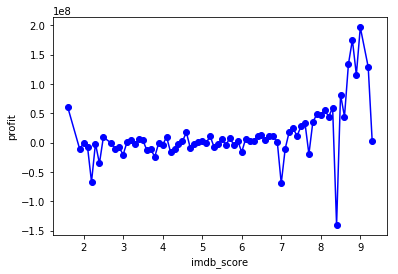

In [427]:
#Using this website: https://github.com/divyaaligireddy/IMDB-data-analysis/blob/master/IMDB_data_analysis.ipynb
#I was able to come up with this represenation of score vs profit. Please see sources for link
#REference 3
def score_vs_profit(md, y="gross"):
    md_svp = md.pivot_table(index="imdb_score", values=y, aggfunc=np.mean)
    plt.plot(md_svp.index, md_svp.values, "-bo")
    plt.ylabel(y)
    plt.xlabel("imdb_score")
score_vs_profit(md, "profit")

From this graph, we are able to see that IMDB score hovers right around even until it reaches the 7-7.5 mark. That is when we start seeing some exponential jumps in profit. Interestingly, the highest scoring IMDB movie did not make very much money in the box office. This movie was Shawshank Redemption. We can assume that because of the nature of the release time (forrest gump and Lion King within the same year, both much more successful financially), that it took people alot of time to figure out that the movie was so good. My guess is that the reviews grew over time. 

Text(0.5,1,'imdb score vs movie FB likes')

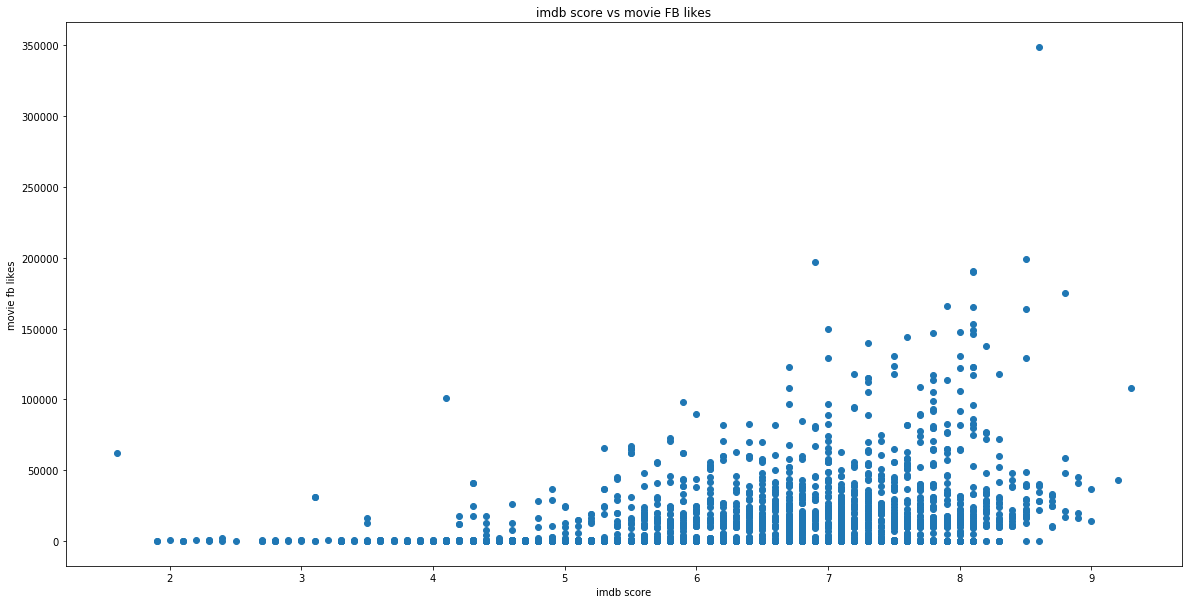

In [428]:
plt.figure(figsize=(20,10))
plt.scatter(md['imdb_score'],md['movie_facebook_likes'])
plt.xlabel('imdb score')
plt.ylabel('movie fb likes')
plt.title('imdb score vs movie FB likes')

From the chart above, we can tell that there is a general positive correlation between the IMDB score and the amount of likes that the movie has on facebook. We can also do the same thing for each of the actors and the director. For space's sake, I will do that of the director and that of the first actor. This will give us a general understanding on the affect that each of those people have on the success of a film.  

Text(0.5,1,'imdb score vs actor 1 FB likes')

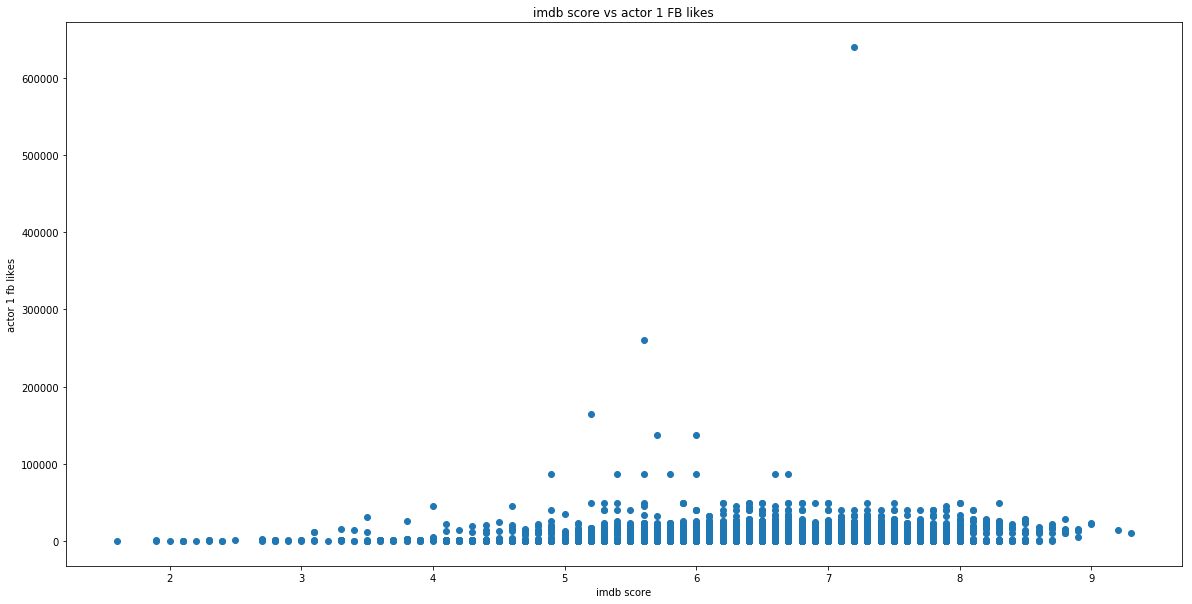

In [429]:
plt.figure(figsize=(20,10))
plt.scatter(md['imdb_score'],md['actor_1_facebook_likes'])
plt.xlabel('imdb score')
plt.ylabel('actor 1 fb likes')
plt.title('imdb score vs actor 1 FB likes')

Text(0.5,1,'imdb score vs director FB likes')

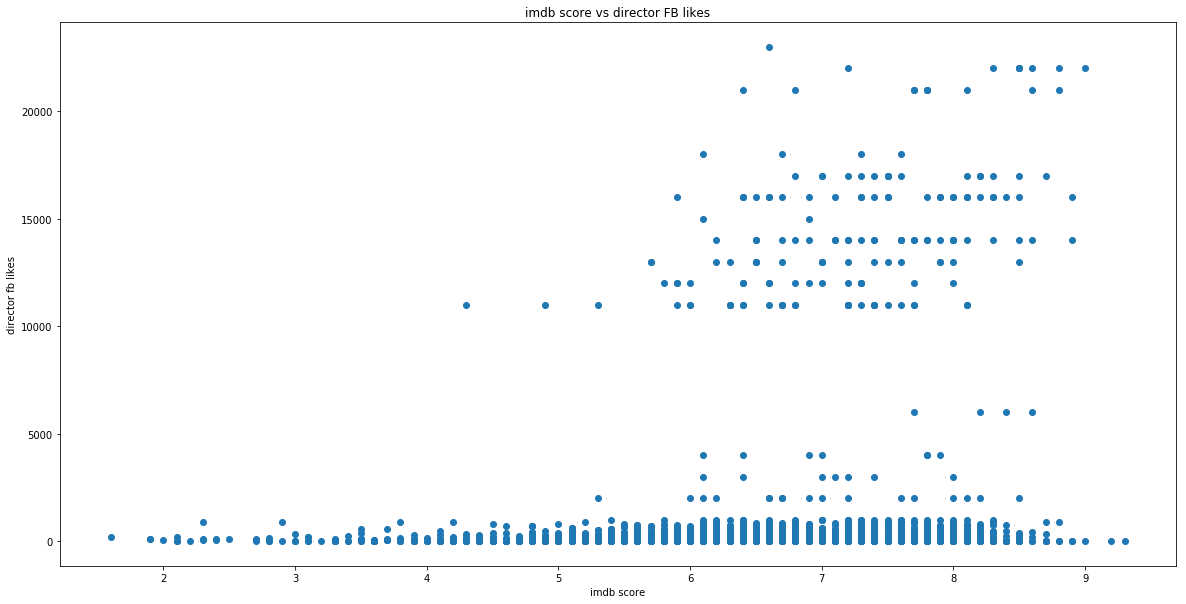

In [430]:
plt.figure(figsize=(20,10))
plt.scatter(md['imdb_score'],md['director_facebook_likes'])
plt.xlabel('imdb score')
plt.ylabel('director fb likes')
plt.title('imdb score vs director FB likes')

As seen in the above charts, the lead actor has a very small affect on the success of the movie, however, it is not very noticable. There is only one movie that is above a 7 that contains an actor with a significant number of facebook likes. The rest are below 6. The average sits at around a 6.5-7. 

ON the other hand, the director does have somewhat of an effect on the success of the film. As can be seen above, any movie that contains a 'high profile' director (that is, one with a high amount of facebook likes), on average, sit at above a 6.0 rating on the IMDB scale. Therefore, what can be said about this is that if you get a high profile director for your movie, you can guarantee that the movie will get an "average" score just by nature of who is directing it. This could be due to the fact that those high profile directors tend to make good movies, but one could make an argument that those directors have put out movies that are not worthy of the score they received, but they received those scores anyway by nature of the bias towards who is directing the movie. It's hard to tell just from this chart and you would have to go further into detail analyzing each movie that each director has made. That would take quite a bit of time!

Now, out of curiosity, I wonder if the number of faces on the poster has an effect on the success of a film? Let's find out: 

In [431]:
md['facenumber_in_poster'].value_counts()

0.000000     1582
1.000000      955
2.000000      533
3.000000      294
4.000000      163
5.000000       76
6.000000       57
8.000000       32
7.000000       30
9.000000       11
10.000000       6
1.377165        5
11.000000       5
15.000000       4
12.000000       3
31.000000       1
14.000000       1
19.000000       1
13.000000       1
43.000000       1
Name: facenumber_in_poster, dtype: int64

(0, 8)

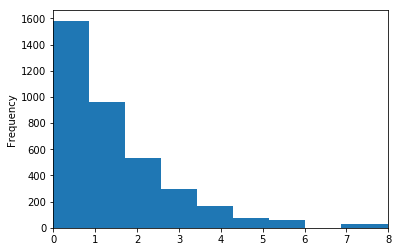

In [432]:
md['facenumber_in_poster'].plot(kind='hist', bins=50)
plt.xlim(0,8)

Hmm, it looks like that a majority of movies have less than 6 faces on the movie poster. I wonder how many have greater than a 7.0 on the imdb scale and what the correlating facenumber is? Let's see...

In [433]:
md[(md.imdb_score > 7.0)][['movie_title','facenumber_in_poster','imdb_score']].sort_values('imdb_score',ascending=False).head(20)

,movie_title,facenumber_in_poster,imdb_score
1801,The Shawshank Redemption,0.0,9.3
3010,The Godfather,1.0,9.2
2549,The Godfather: Part II,1.0,9.0
64,The Dark Knight,0.0,9.0
328,The Lord of the Rings: The Return of the King,2.0,8.9
3558,"The Good, the Bad and the Ugly",3.0,8.9
1743,Schindler's List,0.0,8.9
2935,Pulp Fiction,1.0,8.9
260,The Lord of the Rings: The Fellowship of the R...,2.0,8.8
1896,Star Wars: Episode V - The Empire Strikes Back,0.0,8.8


Kind of hard to tell from this, but the first facenumber value greater than 3 doesn't occur until the 18th row. This is pretty representative of what we saw above. So I'm interested to see the IMDB scores that have more than 6 faces...

In [434]:
md[(md.facenumber_in_poster > 6) &(md.imdb_score > 7.0)][['movie_title','facenumber_in_poster','imdb_score']].sort_values('imdb_score',ascending=False).head(10)

,movie_title,facenumber_in_poster,imdb_score
1608,Once Upon a Time in America,8.0,8.4
2393,Lawrence of Arabia,8.0,8.4
46,X-Men: Days of Future Past,7.0,8.0
2416,Boogie Nights,15.0,7.9
2205,Birdman or (The Unexpected Virtue of Ignorance),8.0,7.8
3012,500 Days of Summer,43.0,7.7
1033,Love Actually,9.0,7.7
584,Stardust,8.0,7.7
1292,The Town,7.0,7.6
3109,Best in Show,9.0,7.5


It's pretty clear that the more faces there are on the poster, the less the IMDB score. However, just because the IMDB score is correlated to the number of faces on the poster, does not mean that there is a causality between the two. I'm interested to see what percentage of movies have fewer than 6 faces. 

In [435]:
count = md['facenumber_in_poster'].value_counts()/len(md['facenumber_in_poster'])*100
count.head(7)

0.0    42.063281
1.0    25.392183
2.0    14.171763
3.0     7.817070
4.0     4.333954
5.0     2.020739
6.0     1.515554
Name: facenumber_in_poster, dtype: float64

In [436]:
count.head(7).sum()

97.31454400425419

So it appears that 97.3% of movies have less than 6 people on the poster, therefore, I don't think that this is too important. However, it's interesting to note the correlation between the two variables!

Now, what about duration? Let's take a look at the effect that the length of the movie has on the rating of said film. 

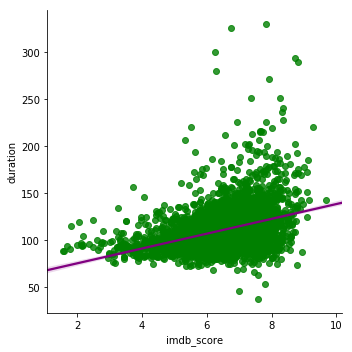

In [437]:
sns.lmplot("imdb_score", "duration", md, y_jitter=0.40, x_jitter=.40,scatter_kws={'color': 'green'},line_kws={'color': 'purple'})

By looking at the graph above, it's VERY clear that there is a positive correlation between the duration of the movie and the score it receives on IMDB. I will also address this below in the correlation analysis. 

## ---------------------- Correlation Analysis ----------------------

### 1. Perform correlation analysis and discuss the results. Again, what variables are correlated to imdb_score? How are some key variables correlated to eachother? 

First, I'm going to remove some names from the dataset that might not be needed for a correlation analysis, meaning I'm only going to choose continuous variables. So I won't include actor's names, director's names, etc. 

In [438]:
md.columns

Index([u'Unnamed: 0', u'color', u'director_name', u'num_critic_for_reviews',
       u'duration', u'director_facebook_likes', u'actor_3_facebook_likes',
       u'actor_2_name', u'actor_1_facebook_likes', u'gross', u'genres',
       u'actor_1_name', u'movie_title', u'num_voted_users',
       u'cast_total_facebook_likes', u'actor_3_name', u'facenumber_in_poster',
       u'plot_keywords', u'movie_imdb_link', u'num_user_for_reviews',
       u'language', u'country', u'content_rating', u'budget', u'title_year',
       u'actor_2_facebook_likes', u'imdb_score', u'aspect_ratio',
       u'movie_facebook_likes', u'profit'],
      dtype='object')

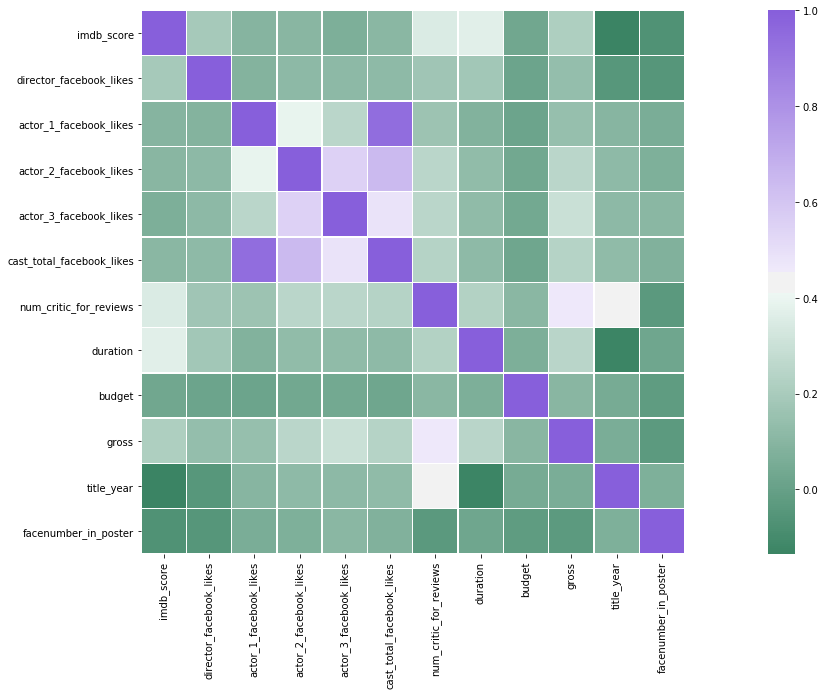

In [439]:
#source used for this: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
#source 4
md_corr = md[['imdb_score','director_facebook_likes','actor_1_facebook_likes', 'actor_2_facebook_likes','actor_3_facebook_likes', 'cast_total_facebook_likes','num_critic_for_reviews','duration','budget','gross','title_year','facenumber_in_poster']]

correlation = md_corr.corr()

#source used: https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots
#source 5
f, ax = plt.subplots(figsize=(30,10))

sns.heatmap(correlation, cmap = sns.diverging_palette(150,275,as_cmap=True),square=True,linewidths=.5,ax=ax)

Conclusions to be drawn: 

- movie_facebook_likes has a large correlation with num_voted_users

- Actor_1_facebook_likes has a strong positive correlation with cast_total_facebook_likes, and the cast total likes has a small positive correlaiton with actor 2 and 3 facebook likes. 

- the 'gross' of the movie is strongly correlatied with the 'num_voted_users'

- 'imdb_score' has a positive correlation with the 'duration'. This confirms the analysis i did above in saying that duration will affect score

- 'imdb_score' has a very small positive correlation with 'director_facebook_likes', meaning that the director can influence the success of the movie, however, is not the major contributing factor to the movie's success in the box office. This is similar to what I said in the analysis above. 

- 'imdb_score' has little to no correlation with the 'budget' of the movie! INteresting... 

- the 'title_year' has almost no correlation with the 'imdb_score'

- the 'facenumber_in_poster' has a negative correlation with the 'imdb_score'. Which is similar to what I said in my analyis above
  

## ---------------------- Storytelling ----------------------

### Useful insights:

### 1. 
###### The best predictor of the success of a film is the length of said film. The 'duration' column in the dataset has proven to be moderately correlated with the success of the movie. 

### 2. 
###### Additionally, whereas you would think that budget would be a primary determinant in the success of a movie, the data proves that not to necessarily be the case. Whereas a film can find success by dumping a truckload of money into the production, that will not always guarantee a strong score with the users or critics.
### 3. 
###### Next, while the number of faces on a poster may seem like a telling sign of the potential success of a movie, that has proven not to be the case. However, the data does show that a huge majority of successful movies have fewer than 6 characters on the poster. This could be due to 2 factors: 1) Most movies that are made (>97%) have posters that contain less than 6 people on it, or 2) that faces on posters actually do mean a less successful movie. It's pretty hard to tell but the data speaks for itself... Keep your poster people count down to a minimum! 

### 4. 
###### The popularity of the actors and the director are a positive determinant in the success of a film. Meaning, that if you have a popular director and cast, your movie will be more succesful than a film that does not have those. That being said, if you have a popular director only, you are taking a risk on whether the film will be good or not. Since the director is normally not the face of the film, the chances of the film being as successful are lower. 

### 5. 
###### The number of critics for reviews does have a small positive correlation with the success of the movie. This could be to a couple factors. One being that more critics reviewing the movie inherently means that it's most likely already going to be a more popular movie. Either that, or that since more critics have reviewed it, that means that more people are going to be drawn to watching the movie. 

#### References

[1] https://www.latentview.com/blog/using-analytics-to-predict-movie-success/

[2] https://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html

[3] https://github.com/divyaaligireddy/IMDB-data-analysis/blob/master/IMDB_data_analysis.ipynb

[4] https://seaborn.pydata.org/generated/seaborn.diverging_palette.html

[5] https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots

# ------------------------------ Final Project Data --------------------------------


## ----------------------- Building Regression ------------------------

In [440]:
md2 = md[['imdb_score','director_facebook_likes','actor_1_facebook_likes', 'actor_2_facebook_likes','actor_3_facebook_likes', 'num_critic_for_reviews','duration','budget','gross','num_user_for_reviews','num_voted_users']]

## Linear Regression

In [441]:
# define X & y

y = md2['imdb_score']
X = md2.drop(['imdb_score'],axis=1)

In [442]:
# Build a regression model 

model1 = lm.LinearRegression()
model1.fit(X, y)
model1_y = model1.predict(X)
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 7.92242292e-06  4.82141587e-07  1.40900566e-06 -4.37588754e-05
  1.26099058e-03  1.16552680e-02 -4.70727690e-11 -2.12979911e-09
 -5.14971804e-04  3.93396651e-06]
y-intercept  4.860815897038242


In [443]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.7565430269182422
variance or r-squared:  0.32140697629713955


As we can see here, the LinearRegression model we built is not very accurate. With a 32% r-squared value, it's clear that this regression model is not the best and we should probably find another model that will be more accurate. Let's try randomforest. 

## Random Forest Regression

In [444]:
#randomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

y = md2['imdb_score']
X = md2.drop(['imdb_score'],axis=1)

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.1030009306035629
variance or r-squared:  0.9078176669782597


In [445]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.03578296363207288, 'actor_1_facebook_likes'),
 (0.041712846713911345, 'actor_2_facebook_likes'),
 (0.04477397957926805, 'actor_3_facebook_likes'),
 (0.04697453215888507, 'director_facebook_likes'),
 (0.05894474670717851, 'num_critic_for_reviews'),
 (0.08229246293130746, 'gross'),
 (0.08281631209650432, 'num_user_for_reviews'),
 (0.12929050862347563, 'duration'),
 (0.13377681383530965, 'budget'),
 (0.34363483372208703, 'num_voted_users')]

This is much better. RandomForest is a much more accurate regression model with about 90.8% accuracy. I have also listed in order the most important features in the model. It's clear that the num_voted_users is the most important. So, out of curiosity, I'm going to get rid of that variable and see what the difference is. I will be running RandomForest again to keep things accurate. Let's see:

In [446]:
y = md2['imdb_score']
X = md2.drop(['imdb_score','num_voted_users'],axis=1)

regr2 = RandomForestRegressor(random_state=0)
regr2.fit(X, y)
regr2_predicted = regr2.predict(X)

print "mean square error: ", mean_squared_error(y, regr2_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr2_predicted)

mean square error:  0.12274714171762831
variance or r-squared:  0.8900749554682772


Only a 1.7% difference. NOt that bad! Now let's build some other models

## Lasso

In [447]:
#Lasso
y = md2['imdb_score']
X = md2.drop(['imdb_score'],axis=1)

model_lass = lm.Lasso(alpha=.1)          
model_lass.fit(X, y)
model_lassy = model_lass.predict(X)



print "mean square error: ", mean_squared_error(y, model_lassy)
print "variance or r-squared: ", explained_variance_score(y, model_lassy)

mean square error:  0.756567881233077
variance or r-squared:  0.3213846828332443


Well, this model is only 32% accurate as well. So, it's not the best model to use. Let's try the Ridge model: 

## Ridge

In [457]:
y = md2['imdb_score']
X = md2.drop(['imdb_score'],axis=1)

rig  = lm.Ridge(alpha=.1) 
rig.fit(X, y)
rig_y = rig.predict(X)


print "mean square error: ", mean_squared_error(y, rig_y)
print "variance or r-squared: ", explained_variance_score(y, rig_y)

mean square error:  0.7565430269182424
variance or r-squared:  0.32140697629713944


This is virtually the same as the Lasso method and should be considered the exact same since the difference is only about .002% in favor of Ridge model.

## feature selection

In [449]:
#feature selection
X_new = SelectKBest(f_regression, k=5).fit_transform(X, y)
X_new

array([[7.23000000e+02, 1.78000000e+02, 7.60505847e+08, 3.05400000e+03,
        8.86204000e+05],
       [3.02000000e+02, 1.69000000e+02, 3.09404152e+08, 1.23800000e+03,
        4.71220000e+05],
       [6.02000000e+02, 1.48000000e+02, 2.00074175e+08, 9.94000000e+02,
        2.75868000e+05],
       ...,
       [1.43000000e+02, 7.70000000e+01, 4.24760000e+05, 3.71000000e+02,
        7.26390000e+04],
       [5.60000000e+01, 8.10000000e+01, 2.04092000e+06, 1.30000000e+02,
        5.20550000e+04],
       [4.30000000e+01, 9.00000000e+01, 8.52220000e+04, 8.40000000e+01,
        4.28500000e+03]])

In [455]:
model_fs = lm.LinearRegression()
model_fs.fit(X_new, y)
model_fsy = model_fs.predict(X_new)

print "mean square error: ", mean_squared_error(y, model_fsy)
print "variance or r-squared: ", explained_variance_score(y, model_fsy)

mean square error:  0.7625435050912256
variance or r-squared:  0.3160247541601455


Well, 5-6 variables seems to be the best number of variables to use. However, the accuracy is still quite low. If I increase or decrease the k value too much, the r-squared value decreases substantially. So, I think 5 variables can get you roughly 31.6% accuracy on whether a movie will be successful. And I guess this makes sense if you think about it. But it also goes to show that the top 5 variables can predict the success just as well as the top 9-10 variables!

## RandomForest Feature selection

In [458]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

y = md2['imdb_score'] 
X = md2.drop(['imdb_score'],axis = 1)

regr2 = RandomForestRegressor(random_state=0)
regr2.fit(X, y)
regr_predicted2 = regr2.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted2)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted2)

mean square error:  0.1030009306035629
variance or r-squared:  0.9078176669782597


In [459]:
sorted(zip(regr2.feature_importances_, X.columns))

[(0.03578296363207288, 'actor_1_facebook_likes'),
 (0.041712846713911345, 'actor_2_facebook_likes'),
 (0.04477397957926805, 'actor_3_facebook_likes'),
 (0.04697453215888507, 'director_facebook_likes'),
 (0.05894474670717851, 'num_critic_for_reviews'),
 (0.08229246293130746, 'gross'),
 (0.08281631209650432, 'num_user_for_reviews'),
 (0.12929050862347563, 'duration'),
 (0.13377681383530965, 'budget'),
 (0.34363483372208703, 'num_voted_users')]

So, using random forest feature selection, I am able to see that num voted users, budget and duration are the most important features by a decent margin. so If i drop those, I wonder what the new important features will be...

In [460]:
y = md2['imdb_score'] 
X = md2.drop(['imdb_score', 'num_voted_users','budget','duration'],axis = 1)

regr2 = RandomForestRegressor(random_state=0)
regr2.fit(X, y)
regr_predicted2 = regr2.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted2)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted2)

mean square error:  0.1515019143844722
variance or r-squared:  0.8643732045370238


In [461]:
sorted(zip(regr2.feature_importances_, X.columns))

[(0.08469862284283146, 'actor_2_facebook_likes'),
 (0.10567903227933265, 'actor_1_facebook_likes'),
 (0.11683866199237795, 'actor_3_facebook_likes'),
 (0.1473209897381663, 'gross'),
 (0.15099150858085672, 'director_facebook_likes'),
 (0.18698091220345844, 'num_critic_for_reviews'),
 (0.20749027236297643, 'num_user_for_reviews')]

Interesting. Here we can see that gross has dropped below critic reviews and director facebook likes once we got rid of the highest 3 predictors earlier. I wonder why that is?

## Classification

In [462]:
md2['imdb_score_category'] = 1
md2.loc[(md2['imdb_score'] > 4) & (md2['imdb_score'] <=6),'imdb_score_category'] = 2
md2.loc[(md2['imdb_score'] > 6) & (md2['imdb_score'] <=8),'imdb_score_category'] = 3
md2.loc[md2['imdb_score'] > 8,'imdb_score_category'] = 4
md2.head()

C:\Users\aoveg\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,imdb_score,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,num_critic_for_reviews,duration,budget,gross,num_user_for_reviews,num_voted_users,imdb_score_category
0,7.9,0.0,1000.0,936.0,855.0,723.0,178.0,237000000.0,760505847.0,3054.0,886204,3
1,7.1,563.0,40000.0,5000.0,1000.0,302.0,169.0,300000000.0,309404152.0,1238.0,471220,3
2,6.8,0.0,11000.0,393.0,161.0,602.0,148.0,245000000.0,200074175.0,994.0,275868,3
3,8.5,22000.0,27000.0,23000.0,23000.0,813.0,164.0,250000000.0,448130642.0,2701.0,1144337,4
4,6.6,475.0,640.0,632.0,530.0,462.0,132.0,263700000.0,73058679.0,738.0,212204,3


In [463]:
md3 = md2[['imdb_score_category','director_facebook_likes','actor_1_facebook_likes', 'actor_2_facebook_likes','actor_3_facebook_likes', 'num_critic_for_reviews','duration','budget','gross','num_user_for_reviews','num_voted_users']]

## Decision Tree Classifier

In [464]:
y = md3['imdb_score_category']
X = md3.drop(['imdb_score_category'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"


0.674933569530558
--------------------------------------------------------
[[  2  14   5   1]
 [ 11 167 136   3]
 [ 16 139 566  21]
 [  0   0  21  27]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.07      0.09      0.08        22
          2       0.52      0.53      0.52       317
          3       0.78      0.76      0.77       742
          4       0.52      0.56      0.54        48

avg / total       0.68      0.67      0.68      1129

--------------------------------------------------------


The decision tree model has an accuracy of 67.84%. This is not bad, but let's try out some other models to see which is most effective, starting with Knn.

## Knn

In [465]:
#Knn
y = md3['imdb_score_category']
X = md3.drop(['imdb_score_category'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))
print "--------------------------------------------------------"

0.6147032772364924
--------------------------------------------------------
[[  0   7  15   0]
 [  5  99 213   0]
 [  2 140 594   6]
 [  0   4  43   1]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        22
          2       0.40      0.31      0.35       317
          3       0.69      0.80      0.74       742
          4       0.14      0.02      0.04        48

avg / total       0.57      0.61      0.59      1129

--------------------------------------------------------


Knn has an accuracy of about 61.4% and is actually worse than the DecisionTreeClassification. Now let's try logistic regression:

## Logistic Regression

In [467]:
#Logistic Regression
y = md3['imdb_score_category']
X = md3.drop(['imdb_score_category'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, y_train)

print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))
print "--------------------------------------------------------"

0.633303808680248
--------------------------------------------------------
[[  0   0  22   0]
 [  0   9 308   0]
 [  0   6 681  55]
 [  0   0  23  25]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        22
          2       0.60      0.03      0.05       317
          3       0.66      0.92      0.77       742
          4       0.31      0.52      0.39        48

avg / total       0.61      0.63      0.54      1129

--------------------------------------------------------


C:\Users\aoveg\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression is about 63% accurate. What about Random Forest?

## RandomForest Regression

In [468]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7395925597874224

Here we can see that RandomForest is much more accurate than the other models. This is about 10% more accurate than that of the DecisionTreeClassifier. 

Now i'm just going to do a 10-fold cross validation of randomforest since we can't do an ROC. 

In [469]:
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.7010582  0.72751323 0.71693122 0.72148541 0.78457447 0.78989362
 0.712      0.768      0.70855615 0.72459893]
0.7354611221963516


So, the randomforestclassification model will perform with 73% accuracy when put into practice. Depending on the classification method that is used, the percent will go down (most likely). Below is if I use logisic regression:

In [470]:
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.65343915 0.66931217 0.65873016 0.64986737 0.68085106 0.67553191
 0.632      0.632      0.60427807 0.48128342]
0.6337293331536393


What about decisiontree?

In [471]:
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.61640212 0.64285714 0.68253968 0.66578249 0.70478723 0.66755319
 0.632      0.63466667 0.57754011 0.61497326]
0.6439101896350181


How about Knn?

In [472]:
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.56349206 0.43915344 0.4973545  0.4933687  0.43085106 0.41755319
 0.38933333 0.4        0.48395722 0.6657754 ]
0.47808389092385906


As we can see, from lowest to highest accuracy, random forest is highest, followed by decision tree, then logistic regression, then Knn. 

# ------------------------- Clustering ------------------------

Using the same variables I used in the classification analysis --- u'imdb_score_category', u'director_facebook_likes',
       u'actor_1_facebook_likes', u'actor_2_facebook_likes',
       u'actor_3_facebook_likes', u'num_critic_for_reviews', u'duration',
       u'budget', u'gross', u'num_user_for_reviews', u'num_voted_users' --- here are the variances for each variable. 

In [473]:
md3.var()

imdb_score_category        3.384894e-01
director_facebook_likes    9.401964e+06
actor_1_facebook_likes     2.405759e+08
actor_2_facebook_likes     2.063182e+07
actor_3_facebook_likes     3.583695e+06
num_critic_for_reviews     1.529754e+04
duration                   5.137053e+02
budget                     5.102079e+16
gross                      4.955835e+15
num_user_for_reviews       1.692030e+05
num_voted_users            2.316597e+10
dtype: float64

Now let's normalize the data:

In [474]:
df_norm = (md3 - md3.mean()) / (md3.max() - md3.min())
df_norm.head()

,imdb_score_category,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,num_critic_for_reviews,duration,budget,gross,num_user_for_reviews,num_voted_users
0,0.095896,-0.035057,-0.010538,-0.007911,0.003660,0.684946,0.231171,0.015614,0.930718,0.537384,0.461816
1,0.095896,-0.010578,0.050400,0.021753,0.009964,0.165834,0.200454,0.020772,0.337558,0.178207,0.216216
2,0.095896,-0.035057,0.005087,-0.011874,-0.026514,0.535747,0.128782,0.016269,0.193798,0.129948,0.100601
3,0.429230,0.921465,0.030087,0.153140,0.966486,0.795920,0.183389,0.016678,0.519971,0.467566,0.614587
4,0.095896,-0.014405,-0.011100,-0.010130,-0.010471,0.363121,0.074174,0.017800,0.026784,0.079315,0.062922


Now here are the variances. Much better!

In [475]:
df_norm.var()

imdb_score_category        0.037610
director_facebook_likes    0.017773
actor_1_facebook_likes     0.000587
actor_2_facebook_likes     0.001099
actor_3_facebook_likes     0.006774
num_critic_for_reviews     0.023258
duration                   0.005984
budget                     0.000342
gross                      0.008569
num_user_for_reviews       0.006619
num_voted_users            0.008114
dtype: float64

Now, how many clusters should I use? Let's see:

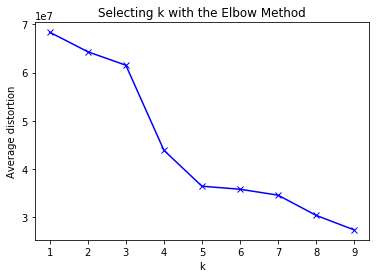

In [476]:
K = range(1, 10) 
meandistortions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

Well, from the above chart, it's clear that 3 clusters is the ideal number to use! So we will do that. Below is the clustering analysis:

In [477]:
# clustering analysis using k-means
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [478]:
k_means.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [479]:
k_means.cluster_centers_

array([[ 0.15478728,  0.10237839,  0.00792299,  0.01917635,  0.04979292,
         0.24438268,  0.05291196,  0.00260674,  0.11169242,  0.11346136,
         0.14405108],
       [-0.26479784, -0.02539723, -0.00240843, -0.00439703, -0.00661454,
        -0.06325926, -0.03267008, -0.00069673, -0.02304662, -0.0258786 ,
        -0.03946553],
       [ 0.10257945, -0.01511567, -0.00092438, -0.0030308 , -0.01053056,
        -0.03462218,  0.00301591, -0.00035713, -0.01907328, -0.01800857,
        -0.01920163]])

In [480]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [481]:
md3 = md3.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df2 = md3.join(df1)
df2.head()

,imdb_score_category,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,num_critic_for_reviews,duration,budget,gross,num_user_for_reviews,num_voted_users,cluster
0,3,0.0,1000.0,936.0,855.0,723.0,178.0,237000000.0,760505847.0,3054.0,886204,0
1,3,563.0,40000.0,5000.0,1000.0,302.0,169.0,300000000.0,309404152.0,1238.0,471220,0
2,3,0.0,11000.0,393.0,161.0,602.0,148.0,245000000.0,200074175.0,994.0,275868,0
3,4,22000.0,27000.0,23000.0,23000.0,813.0,164.0,250000000.0,448130642.0,2701.0,1144337,0
4,3,475.0,640.0,632.0,530.0,462.0,132.0,263700000.0,73058679.0,738.0,212204,0


In [482]:
df2.groupby('cluster').mean()

,imdb_score_category,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,num_critic_for_reviews,duration,budget,gross,num_user_for_reviews,num_voted_users
cluster,,,,,,,,,,,
0,3.176672,3161.006861,12814.782161,4646.951973,1916.063465,365.703259,125.770154,7.810765e+07,1.376323e+08,910.644940,349285.108062
1,1.917917,222.167696,6202.673433,1417.398941,618.691968,116.205649,100.694616,3.775403e+07,3.516245e+07,206.142101,39202.048544
2,3.020049,458.643521,7152.469927,1604.572127,528.623472,139.430318,111.150611,4.190246e+07,3.818420e+07,245.933007,73441.400489


In [483]:
df2.groupby(['cluster']).size()

cluster
0     583
1    1133
2    2045
dtype: int64

So, from the looks of things, we have 3 significantly different clusters here and I kind of want to outline what each of them is. 


##### Cluster Profiling

Cluster 0: 

This cluster looks like it's the "Upper Echelon" of movies that are pretty much in the higher tiers of every category (That be IMDB Score, FB Likes, Reviews, Budget, etc). These movies are the fewest in number (583 out of 3761 total movies, or ~ 15.5% of the total count of movies). I know I just mentioned this, but the average of these movies comes out to be the highest IMDB score, the most director facebook likes, the most actor 1, 2, and 3 facebook likes. They also have the most critic reviews, longest duration, highest budget, highest gross, most users that reviewed it and highest number of users that voted for the movie. 


Cluster 1: 

This cluster appears to contain the opposite of Cluster 0, which are the "Lower Echelon" movies. On average, these movies contain the lowest of every category that is included in my cluster analysis (aside from actor 3 facebook likes...) This Cluster contains 1133 out of 3761 movies, or roughly 30% of movies analyzed. 


Cluster 2: 

This cluster looks to be the "middle echelon" of movies. They contain all the movies that are in between cluster 0 and cluster 1. This Cluster represents what most movies will end up becoming. Containing 54.4% of movies analyzed, statistically speaking, most movies will fall within a similar range of this cluster. If you look at the numbers, they're neither "good", nor "bad" until you analyze every single detail. However, on average, they appear to be "good" movies when compared to that of Cluster 1. Since the IMDB score category is still averaging about a 3. This means that they are typically between 6 and 8 on the IMDB score. 

In [484]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).\
                                                    sort_values('importance',ascending=False)

,feature,importance
9,num_voted_users,0.195796
5,duration,0.116281
6,budget,0.109125
7,gross,0.105228
8,num_user_for_reviews,0.099036
4,num_critic_for_reviews,0.090080
3,actor_3_facebook_likes,0.073326
2,actor_2_facebook_likes,0.072030
0,director_facebook_likes,0.071745
1,actor_1_facebook_likes,0.067354


Above we can see, in order, the most important features in the clustering analysis. I chose to keep variables that I thought were most important. So each variable is still decently important and nothing can be directly removed. However, I find it interesting that the actor 1 facebook likes is LESS important than that of the Actor 3 facebook likes.

Since there are 4 features that are significanly more important than the rest and consist of over a majority of the importance, I'm going to visualize those to get an idea of what they look like in each cluster. 

First, let's do num_voted_users:

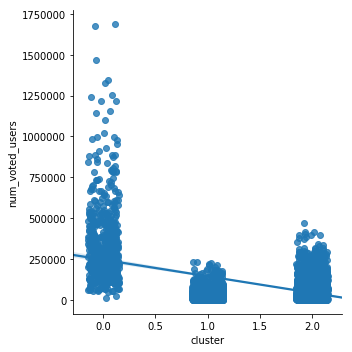

In [485]:
sns.lmplot("cluster", "num_voted_users", df2, x_jitter=.15, y_jitter=.15)

What about duration?

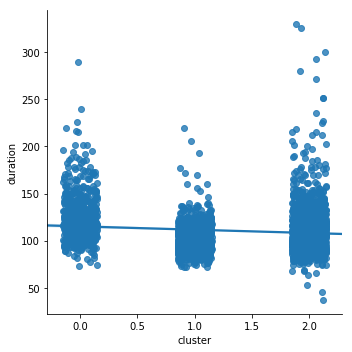

In [486]:
sns.lmplot("cluster", "duration", df2, x_jitter=.15, y_jitter=.15)

What about gross?

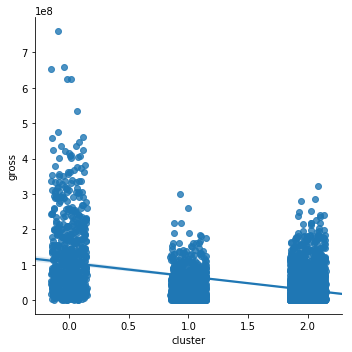

In [487]:
sns.lmplot("cluster", "gross", df2, x_jitter=.15, y_jitter=.15)

What about budget?

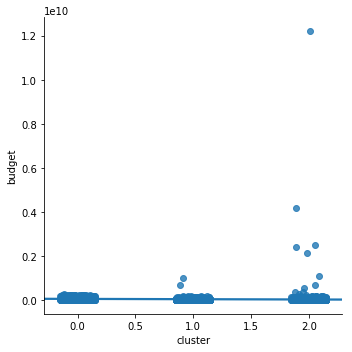

In [488]:
sns.lmplot("cluster", "budget", df2, x_jitter=.15, y_jitter=.15)

As can be seen above, the differences between each cluster are fairly small within the budget and duration graphs, and then much larger within the gross and num voted users graphs. 

## Hierarchical Clustering

In [489]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X) #'ward' is hierarchical algorithm
agg.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

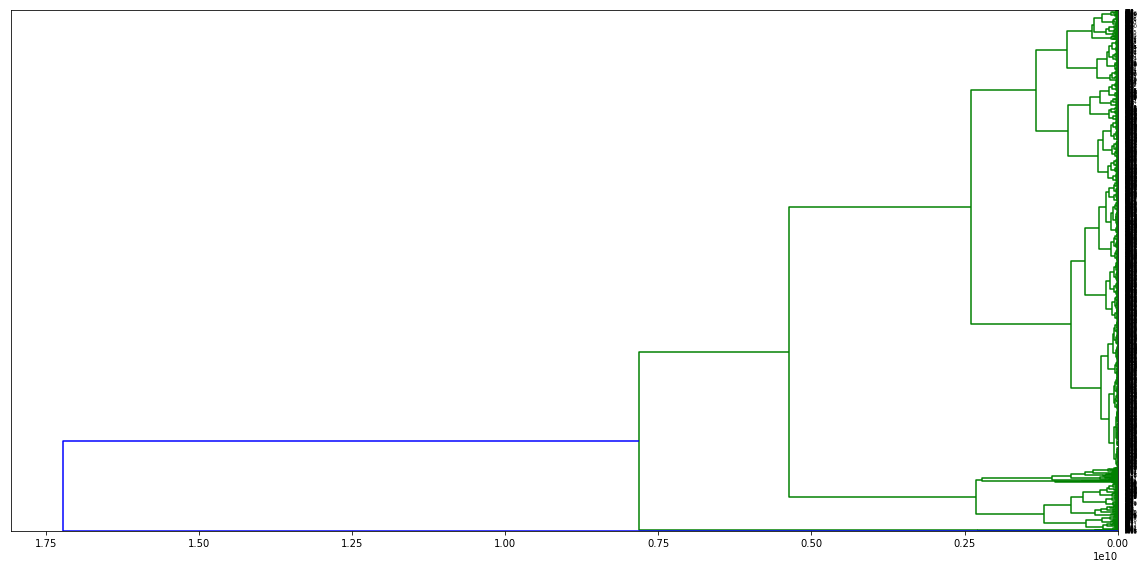

In [490]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

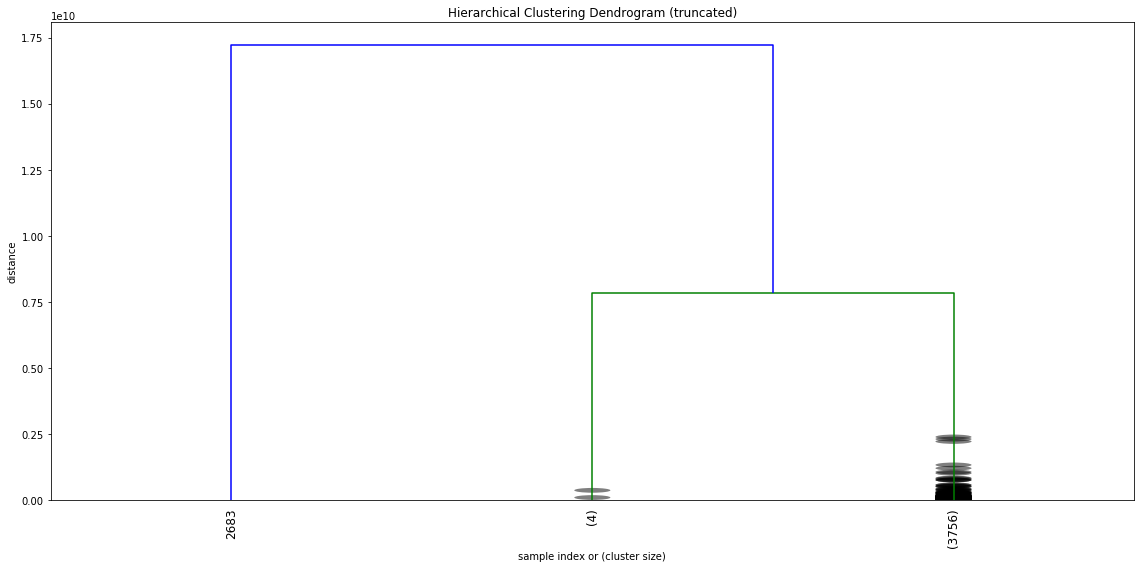

In [491]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=3,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

# ------------------------- Storytelling -----------------------

## Regression

When using regression techniques to analyze the data, I used Linear Regression, Random Forest Regression, Lasso Regression, Ridge Regression, Feature Selection, as well as Random Forest feature selection to try to determine which model would be best to use to analyze the data. Upon completing these, I learned that Random forest regression was the best regression technique to use, and also that RandomForest feature selection provided a much more accurate result than normal feature selection. 

Using these variables:

- director/actor 1/actor 2/ and actor 3 facebook likes
- the number of critics that reviewed the movie, 
- the duration
- the budget
- the gross
- the number of users who reviewed and voted for the movie. 

and the regression techniques below, the percentage chance of success will be as listed. 

The variances for each of the techniques are as follows: 

- Linear Regression --> 32.14%

- Random Forest --> 90.78% (89% w/o num_voted_users)

- Lasso --> 32.13%

- Ridge --> 32.14%

- Feature Selection --> 31.6%

- Random Forest FS --> 90.78% or 86.4% w/o 3 top features)





I started with Linear Regression and since 32% is not a very high number, it was clear that a different method was needed to be used. I then moved to Random Forest regression. Using this method, I was able to get an astonishing 90.78% variance. This is very good and will be hard to beat. Random Forest is notorious for providing very high accuracy results. However, I looked at the importance for each feature and noticed that num_voted_users was a feature that was about 21% higher than the second most important feature. So, I decided to remove it. I then ran the regression model again and got 89% accuracy. That's still very good. I then performed 2 more regression models and got similar accuracy values when compared to Linear Regression. Therefore, Random Forest is the best regression model by a long shot. Also, Random Forest Feature selection is much better than normal feature selection for selecting the most important features. You will be able to get a fairly good model with f_regression, but random forest will give you much more accurate values. 

## Classification

Now, with Classification, I performed multiple models to try to gain an understanding as to which will be the most accurate. The features that I used for classification are the same as regression, but I created an IMDB score category that will put all the IMDB scores into 4 separate categories for easier interpretation. The variables I used for classification are below: 

- imdb score category
- director/actor 1/actor 2/ and actor 3 facebook likes
- the number of critics that reviewed the movie, 
- the duration
- the budget
- the gross
- the number of users who reviewed and voted for the movie. 

My results are as follows:

Using Decision Tree Classifier model, I was able to generate an accuracy of 67.5%. This is not bad, but we will compare to the other models. Using Knn, I obtained an accuracy of 61.4%. This is not quite as accurate as the Decision Tree Classifier model, so we will continue to test other models. Logistic Regression model provided an accuracy of 63.3%, and Random Forest Classifier model provided 74%. After running all the classification models through a 10-fold cross validation,  Random Forest stayed about the same, Decision Tree dropped by 3%, Logistic Regression stayed the same, and Knn dropped quite significantly. Therefore, from lowest to highest accuracy, Random Forest is most accurate at 74%, followed by Decision Tree at 64%, Logistic Regression at 63% and finally Knn at 47% accuracy. 

Given these values, once again, it is best to use Random Forest as the primary model for classification. 

## Clustering

Onto Cluster Analysis. Upon normalization of the data and using the elbow method to find out the ideal K-value (number of clusters), I learned that 3 clusters was ideal for the dataset. Below I will outline the clusters and what they each mean:

Cluster 0: 

This cluster looks like it's the "Upper Echelon" of movies that are pretty much in the higher tiers of every category (That be IMDB Score, FB Likes, Reviews, Budget, etc). These movies are the fewest in number (583 out of 3761 total movies, or ~ 15.5% of the total count of movies). I know I just mentioned this, but the average of these movies comes out to be the highest IMDB score, the most director facebook likes, the most actor 1, 2, and 3 facebook likes. They also have the most critic reviews, longest duration, highest budget, highest gross, most users that reviewed it and highest number of users that voted for the movie. 


Cluster 1: 

This cluster appears to contain the opposite of Cluster 0, which are the "Lower Echelon" movies. On average, these movies contain the lowest of every category that is included in my cluster analysis (aside from actor 3 facebook likes...) This Cluster contains 1133 out of 3761 movies, or roughly 30% of movies analyzed. 


Cluster 2: 

This cluster looks to be the "middle echelon" of movies. They contain all the movies that are in between cluster 0 and cluster 1. This Cluster represents what most movies will end up becoming. Containing 54.4% of movies analyzed, statistically speaking, most movies will fall within a similar range of this cluster. If you look at the numbers, they're neither "good", nor "bad" until you analyze every single detail. However, on average, they appear to be "good" movies when compared to that of Cluster 1. Since the IMDB score category is still averaging about a 3. This means that they are typically between 6 and 8 on the IMDB score. 